In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('C:/Users/alyss/Desktop/wine_reviews_user.csv')

In [53]:
df.head()

,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price
0,M. Chapoutier La Combe Pilate Esteban Brut Nat...,Vintage Sparkling Wine,"Rhone, France",Sparkling & Champagne,Green Wine,750.0,10.0,NaN,NaN,5.0,15.0,49.99,NaN
1,Vinos de Arganza Alvarez de Toledo Godello 2020,Godello,Spain,White Wine,NaN,750.0,0.0,This wine has a bright yellow color with fresh...,NaN,5.0,13.0,10.99,NaN
2,Louis Latour Vosne-Romanee 2019,Pinot Noir,"Vosne-Romanee, Cote de Nuits, Cote d'Or, Burgu...",Red Wine,Boutique,750.0,0.0,NaN,"Toasty, spicy aromas introduce this rich, silk...",5.0,20.0,114.99,119.99
3,Chateau Bouscaut 2020,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France",Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN
4,Brandini Barolo La Morra 2015,Nebbiolo,"Barolo, Piedmont, Italy",Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99


In [54]:
##extract numerical fields
numeric_features = ['Alcohol_percentage', 'Alcohol_vol', 'Avg_rating', 'N_ratings', 'Price_Out-of-stock', 'Price']  
df_numeric = df[numeric_features]

In [55]:
##transfrom Numeric values that cannot be converted to NaN
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

In [56]:
##calculate correlation matrix
correlation_matrix = df_numeric.corr()

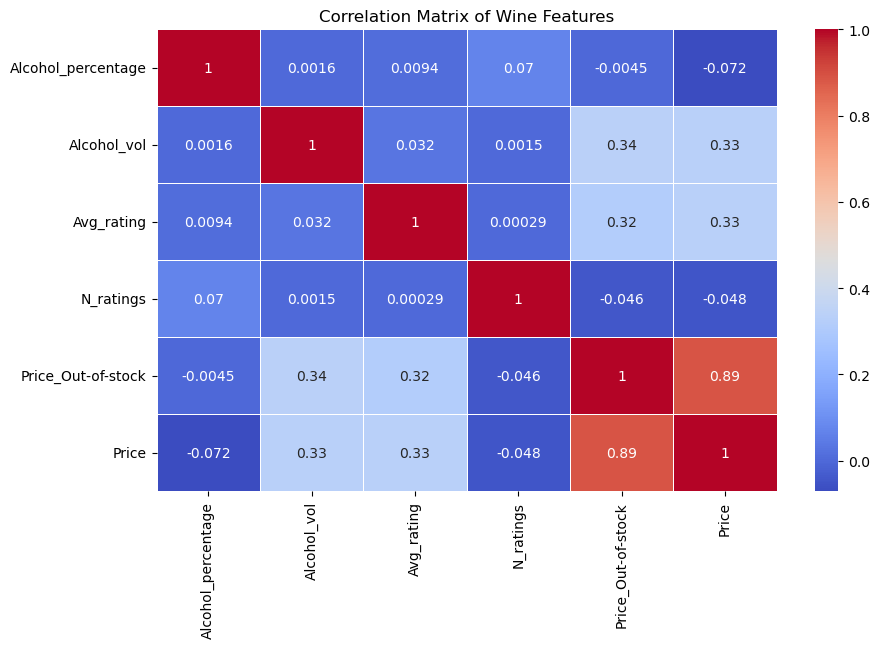

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Wine Features')
plt.show()

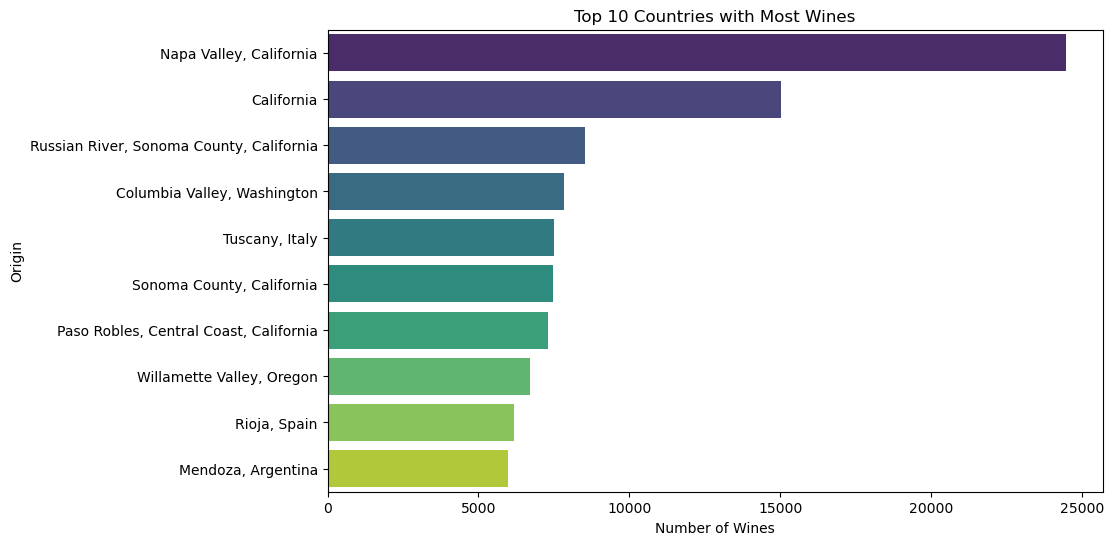

In [58]:
##Top ten countries with the most wines in the dataset
plt.figure(figsize=(10, 6))
top_countries = df['Origin'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Wines')
plt.xlabel('Number of Wines')
plt.ylabel('Origin')
plt.show()

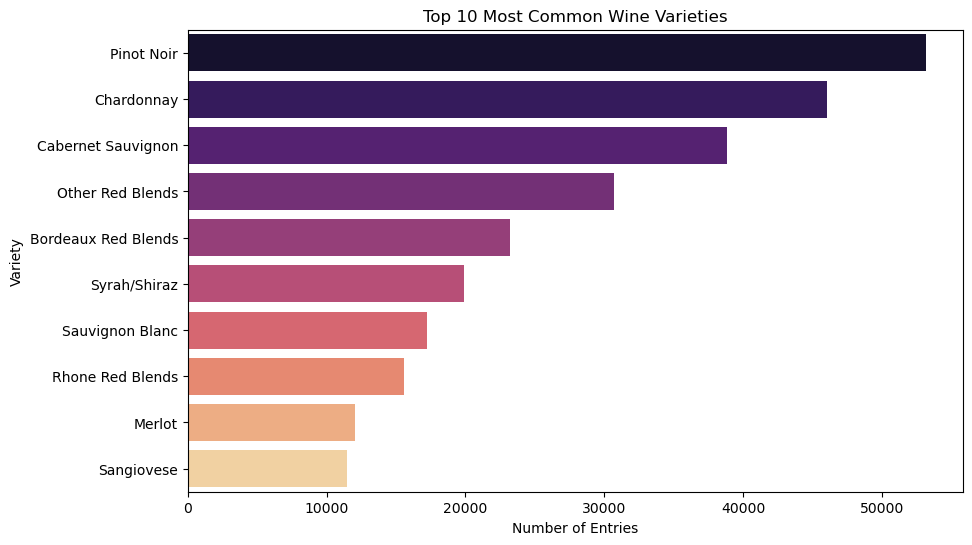

In [59]:
##Top ten grape varieties with the most entries in the dataset
plt.figure(figsize=(10, 6))
top_varieties = df['Variety'].value_counts().head(10)
sns.barplot(x=top_varieties.values, y=top_varieties.index, palette='magma')
plt.title('Top 10 Most Common Wine Varieties')
plt.xlabel('Number of Entries')
plt.ylabel('Variety')
plt.show()

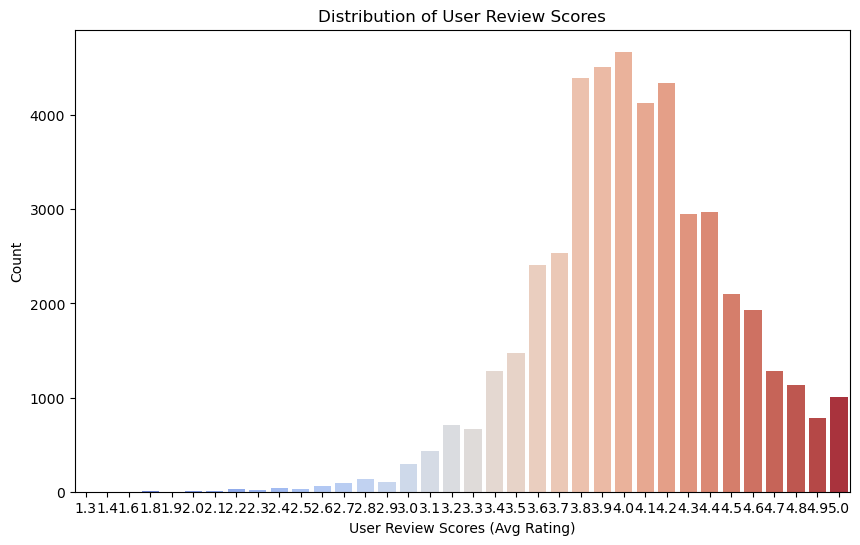

In [60]:
##Distribution of unique values among user review scores
df['Avg_rating'] = pd.to_numeric(df['Avg_rating'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.countplot(x='Avg_rating', data=df, palette='coolwarm')
plt.xlabel('User Review Scores (Avg Rating)')
plt.ylabel('Count')
plt.title('Distribution of User Review Scores')
plt.show()

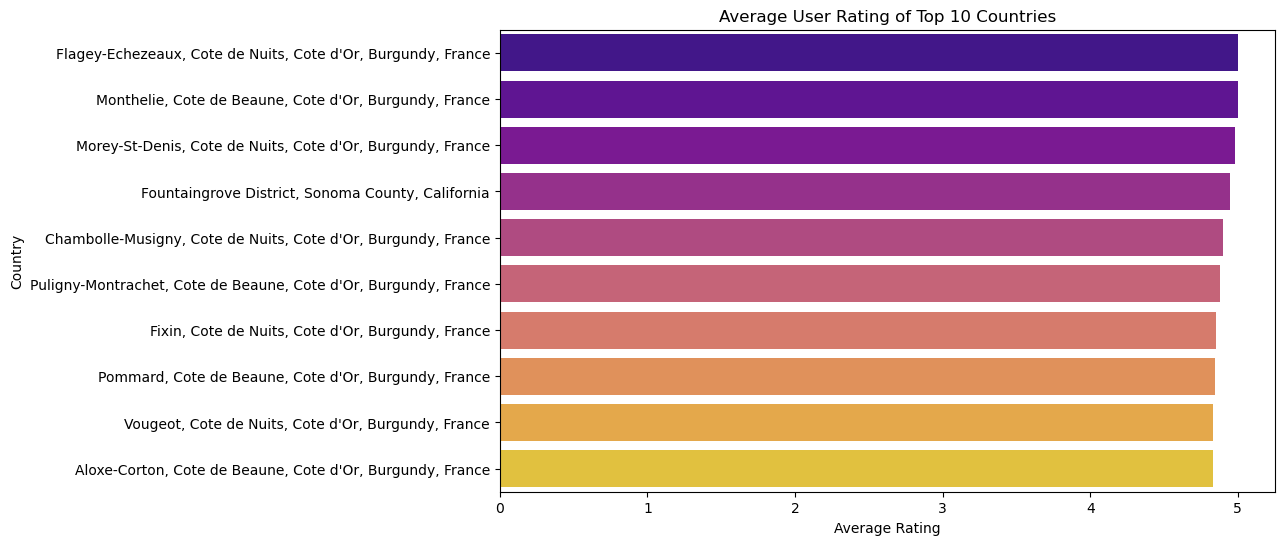

In [61]:
##Average user rating from the top ten countries
plt.figure(figsize=(10,6))
avg_rating_by_country = df.groupby('Origin')['Avg_rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_by_country.values, y=avg_rating_by_country.index, palette='plasma')
plt.title('Average User Rating of Top 10 Countries')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.show()

In [62]:
##check for any entries that are missing a winemaker note or have null values for the wine’s
##provenance.
df = df.dropna(subset=['Winemaker_notes', 'Origin'])
df = df.dropna(subset=['Review'])

In [63]:
df['Price_Out-of-stock'] = pd.to_numeric(df['Price_Out-of-stock'].replace('[^\d.]', '', regex=True), errors='coerce')
df['Price'] = pd.to_numeric(df['Price'].replace('[^\d.]', '', regex=True), errors='coerce')

In [64]:
df['Price_Feature'] = df['Price'].combine_first(df['Price_Out-of-stock'])

In [65]:
##Define a list containing US states
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
             'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
             'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
             'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
             'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
             'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
             'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
def split_origin(origin):
    parts = [part.strip() for part in origin.split(',')]
    if len(parts) == 1:
        return pd.Series([parts[0], None])
    elif len(parts) >= 2:
        country = parts[len(parts)-1]
        region = parts[len(parts)-2]
        zone = parts[len(parts)-3] if len(parts) >= 3 else None
        # Assign "United States" if the region is a known US state
        if country in us_states:
            country = "United States"
        return pd.Series([country, region, zone])
    return pd.Series([None, None]) # Handle any unexpected cases
# Apply the split_origin function to the 'Origin' column
df[['Country', 'Region','Zone']] = df['Origin'].apply(split_origin)

In [66]:
import re

In [67]:
def extract_year(name):
    if pd.isna(name):
        return None
     #Find a four-digit number (year) in the name
    match = re.search(r'\b(20\d{2}|19\d{2})\b', name)
    return int(match.group(0)) if match else None
# Apply the extract_year function to the 'Name' column
df['Year'] = df['Name'].apply(extract_year)

In [68]:
numeric_features = ['Alcohol_percentage', 'Alcohol_vol', 'Avg_rating', 'N_ratings', 'Price_Feature', 'Year']

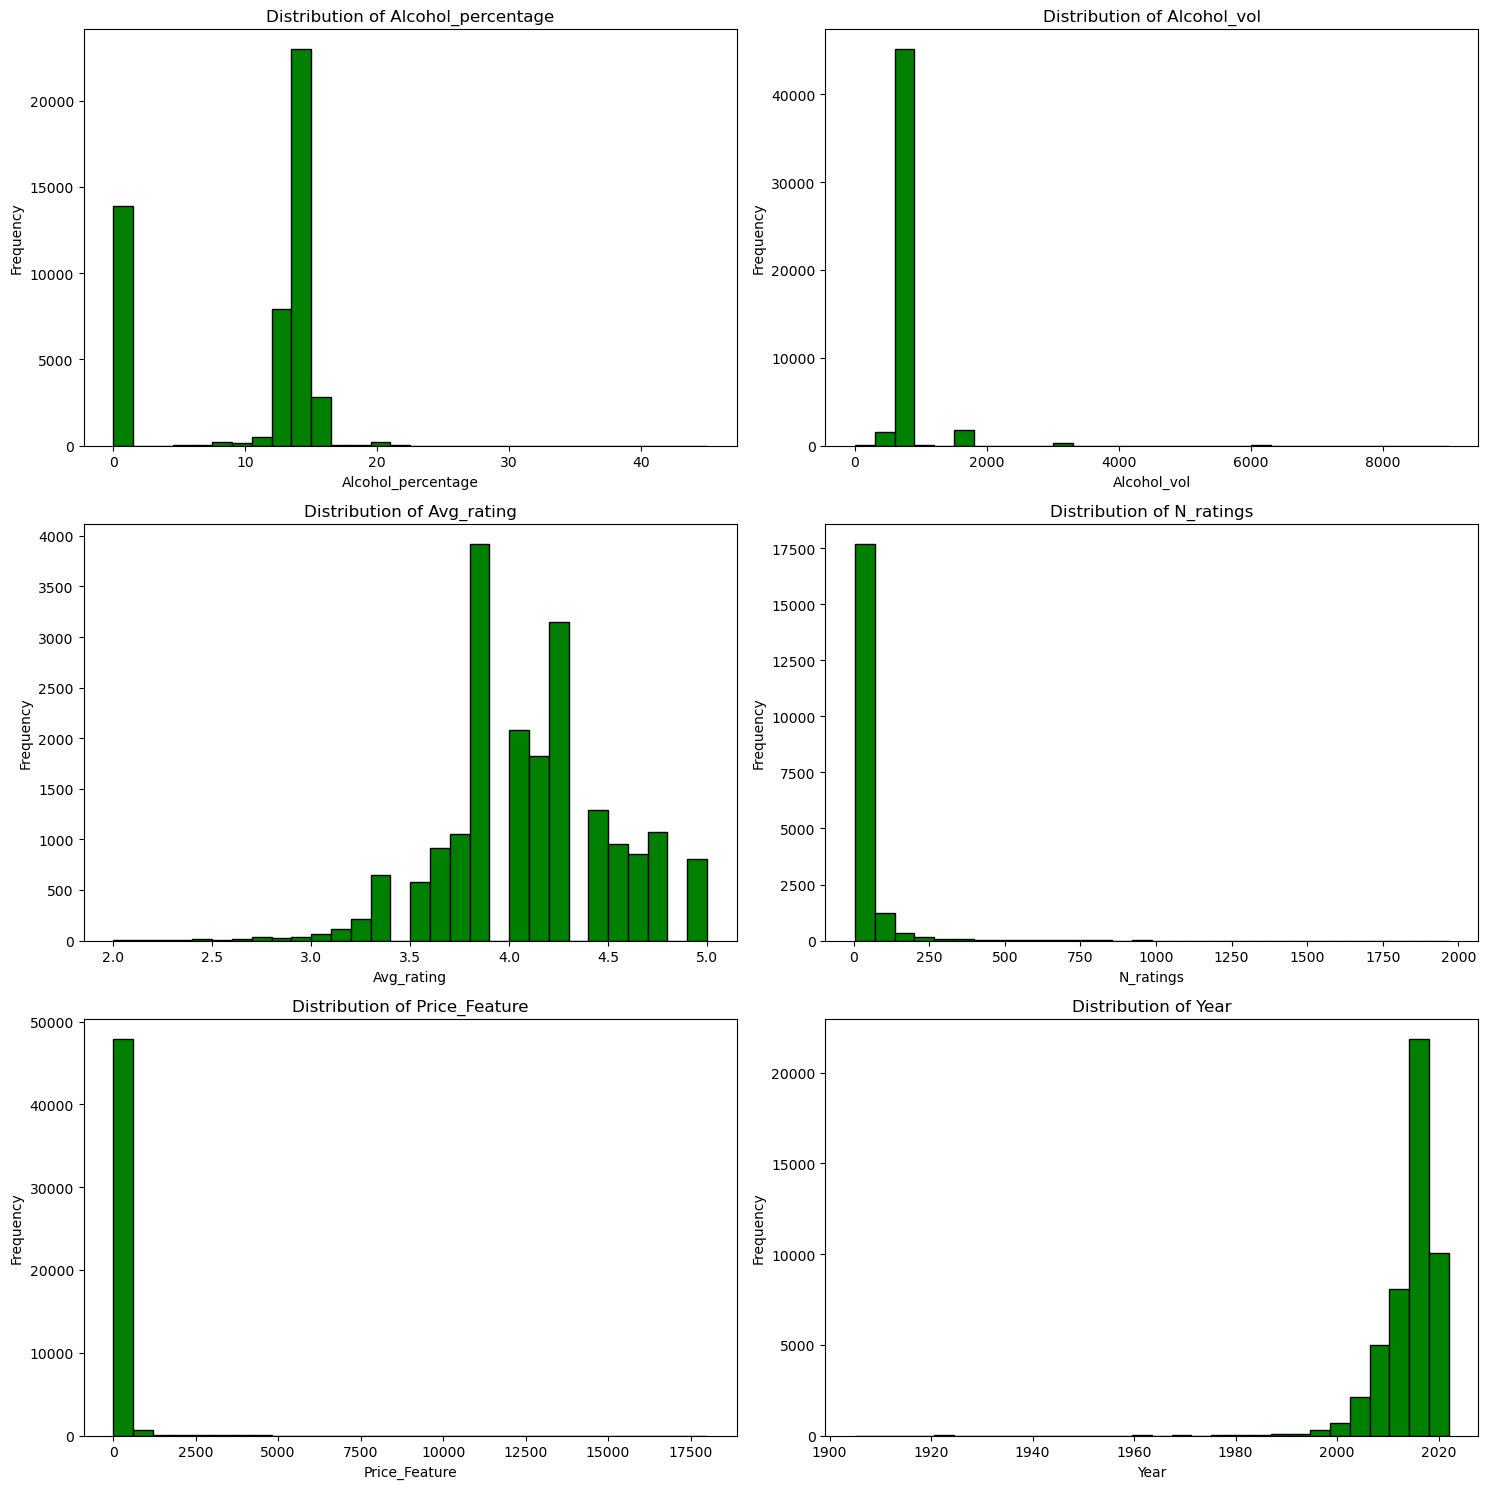

In [87]:
plt.figure(figsize=(15, 15)) 

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)  
    plt.hist(df[feature].dropna(), bins=30, color='green', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [70]:
df.head()

,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price,Price_Feature,Country,Region,Zone,Year
3,Chateau Bouscaut 2020,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France",Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN,44.99,France,Bordeaux,Pessac-Leognan,2020.0
4,Brandini Barolo La Morra 2015,Nebbiolo,"Barolo, Piedmont, Italy",Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99,63.99,Italy,Piedmont,Barolo,2015.0
9,Zind-Humbrecht Calcaire Pinot Gris 2018,Pinot Gris/Grigio,"Alsace, France",White Wine,Boutique,750.0,13.0,Typical pinot gris opulence tempered by limest...,"Flint, smoke, chalk and cream all appear in br...",5.0,7.0,48.99,NaN,48.99,France,Alsace,None,2018.0
10,Tenuta di Biserno Lodovico 2013,Bordeaux Red Blends,"Tuscany, Italy",Red Wine,Boutique,750.0,14.5,"Lodovico is a rare, unexpected assemblage from...","Only available in limited quantities, with the...",5.0,6.0,399.99,NaN,399.99,Italy,Tuscany,None,2013.0
11,Louis Jadot Bonnes-Mares Grand Cru 2017,Pinot Noir,"Morey-St-Denis, Cote de Nuits, Cote d'Or, Burg...",Red Wine,Collectible,750.0,13.5,A powerful perfume of violets and red berries ...,"Extremely perfumed and aromatic character, off...",5.0,24.0,419.99,14.99,14.99,France,Burgundy,Cote d'Or,2017.0


In [74]:
df_clean=df.drop(columns=['Origin','Price','Price_Out-of-stock'])

In [75]:
df_clean.shape[1]

15

In [76]:
df_clean.columns

Index(['Name', 'Variety', 'Attr_1', 'Attr_2', 'Alcohol_vol',
       'Alcohol_percentage', 'Winemaker_notes', 'Review', 'Avg_rating',
       'N_ratings', 'Price_Feature', 'Country', 'Region', 'Zone', 'Year'],
      dtype='object')

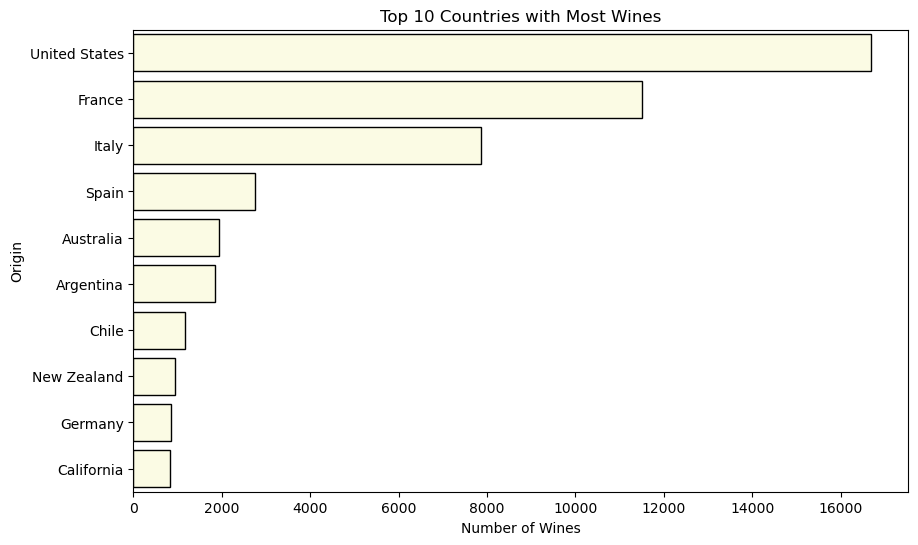

In [83]:
##Top ten countries with the most wines in the dataset
plt.figure(figsize=(10, 6))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, color='lightyellow', edgecolor='black')
plt.title('Top 10 Countries with Most Wines')
plt.xlabel('Number of Wines')
plt.ylabel('Origin')
plt.show()

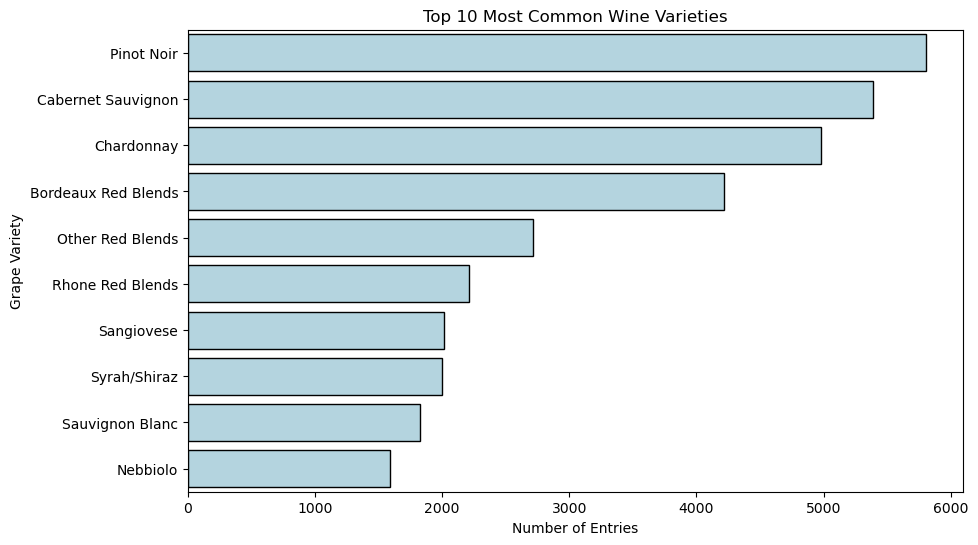

In [82]:
##Top ten grape varieties with the most entries in the dataset
plt.figure(figsize=(10, 6))
top_varieties = df['Variety'].value_counts().head(10)
sns.barplot(x=top_varieties.values, y=top_varieties.index, color='lightblue', edgecolor='black')
plt.title('Top 10 Most Common Wine Varieties')
plt.xlabel('Number of Entries')
plt.ylabel('Grape Variety')
plt.show()

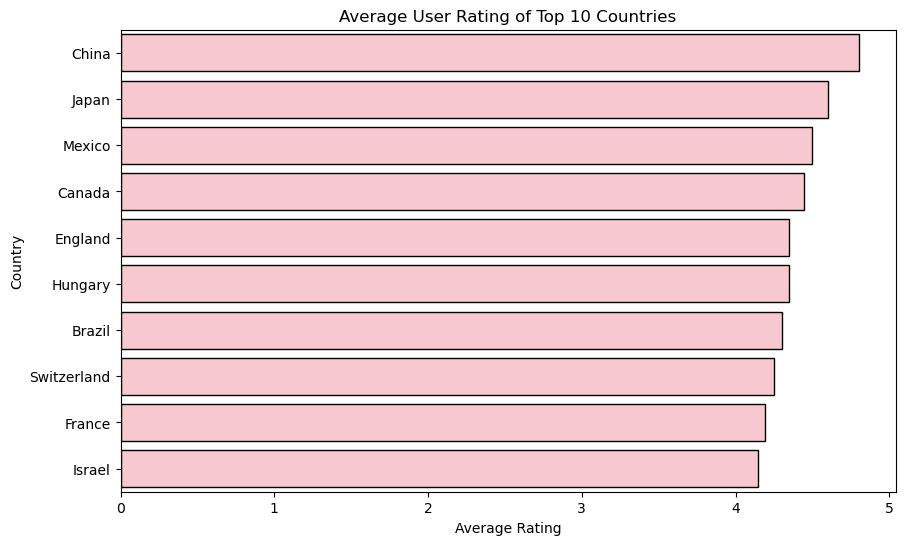

In [85]:
##Average user rating from the top ten countries
plt.figure(figsize=(10,6))
avg_rating_by_country = df.groupby('Country')['Avg_rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_by_country.values, y=avg_rating_by_country.index, color='pink', edgecolor='black')
plt.title('Average User Rating of Top 10 Countries')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.show()